In [11]:
#install dependencies
!pip3 install torch torchvision torchaudio
!git clone https://github.com/ultralytics/yolov5
!pip install -r yolov5/requirements.txt
!pip install Js2Py


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Yoseph\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
fatal: destination path 'yolov5' already exists and is not an empty directory.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Yoseph\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Yoseph\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
#import them and others
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import requests
from IPython.display import Image
import os
from IPython.display import display, Javascript
from js2py import eval_js
from base64 import b64decode

Using cache found in C:\Users\Yoseph/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-11-21 Python-3.11.6 torch-2.0.1+cu117 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


Image Found


image 1/1: 3280x4928 14 persons, 1 dining table
Speed: 1363.9ms pre-process, 380.5ms inference, 2.0ms NMS per image at shape (1, 3, 448, 640)


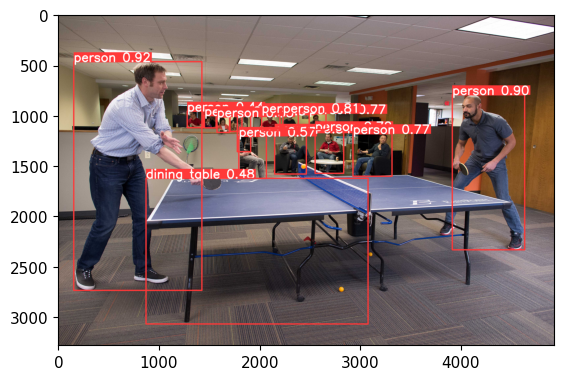

In [4]:
#loading and using the model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
img = 'https://arc-anglerfish-arc2-prod-pmn.s3.amazonaws.com/public/ETOTLFKQHJBSHGBXAZK244MCOY.jpg'

response = requests.get(img)

if response.status_code == 200:
    print("Image Found")
    results = model(img)
    results.print()
    %matplotlib inline
    plt.imshow(np.squeeze(results.render()))
    plt.show()
else:
    print("Failed to download the image. Status code:", response.status_code)


In [17]:
#photo-taking function
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [18]:
#test taking photo
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

ReferenceError: takePhoto is not defined
